# YouTube Kids Content Analysis

This notebook analyzes YouTube data to identify inappropriate content being recommended to kids, despite age restrictions.

In [31]:
# Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [41]:
# Set your YouTube Data API key here
API_KEY = 'ADD YOUTUBE API KEY'

# Search for YouTube Kids videos with a broader query
search_url = 'https://www.googleapis.com/youtube/v3/search'
params = {
    'part': 'snippet',
    'type': 'video',
    'q': 'cartoon',
    'videoCategoryId': '24',  # Category for 'Entertainment' (can be adjusted)
    'maxResults': 100,
    'key': API_KEY
}
response = requests.get(search_url, params=params)
data = response.json()

# Convert results to DataFrame
videos = []
for item in data.get('items', []):
    video = {
        'videoId': item['id']['videoId'],
        'title': item['snippet']['title'],
        'description': item['snippet']['description'],
        'publishedAt': item['snippet']['publishedAt']
    }
    videos.append(video)
df = pd.DataFrame(videos)
df.head()

,videoId,title,description,publishedAt
0,nqKROwPsc7s,cute dancing kitten | Funny Cartoon Cat Video ...,Watch this adorable pink kitten show off its c...,2025-06-07T10:35:37Z
1,cyXUJo3cCf8,Kids Learn About Gas Safety 🔥,Help us improve our content! Share your feedba...,2025-05-14T11:30:30Z
2,qT_OeqrMtU8,Monkey Mischief #billionsurprisetoys #kidsson...,"Uh-oh! A mischievous monkey sends Johny, Dolly...",2025-08-09T15:45:05Z
3,6LM2Fi2aOTw,How To Get A FREE CAKE!! 🎂 #shorts #morphle #k...,Subscribe to Morphle TV Here: https://www.yout...,2025-05-18T17:00:06Z
4,kvZCPwLjJ6A,chintu baraf me kaise jam gya! 😱 #shorts #tren...,chintu baraf me kaise jam gya! #shorts #trendi...,2025-06-03T10:03:09Z


In [42]:
# Define a list of inappropriate keywords (example)
inappropriate_keywords = [
    'violence', 'drugs', 'abuse', 'sex', 'gambling', 'hate', 'scam', 'danger', 'blood', 'weapon', 'shut up', 'why', 'monkey'
]

def check_inappropriate(text):
    text = text.lower()
    return any(word in text for word in inappropriate_keywords)

# Check for inappropriate content in titles and descriptions
df['inappropriate_title'] = df['title'].apply(check_inappropriate)
df['inappropriate_description'] = df['description'].apply(check_inappropriate)

In [43]:
# Fetch comments for each video and check for inappropriate content
def fetch_comments(video_id, api_key):
    comments_url = 'https://www.googleapis.com/youtube/v3/commentThreads'
    params = {
        'part': 'snippet',
        'videoId': video_id,
        'maxResults': 20,
        'key': api_key
    }
    response = requests.get(comments_url, params=params)
    data = response.json()
    comments = []
    for item in data.get('items', []):
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        comments.append(comment)
    return comments

df['comments'] = df['videoId'].apply(lambda vid: fetch_comments(vid, API_KEY))

def check_comments_inappropriate(comments):
    return any(check_inappropriate(comment) for comment in comments)

df['inappropriate_comment'] = df['comments'].apply(check_comments_inappropriate)

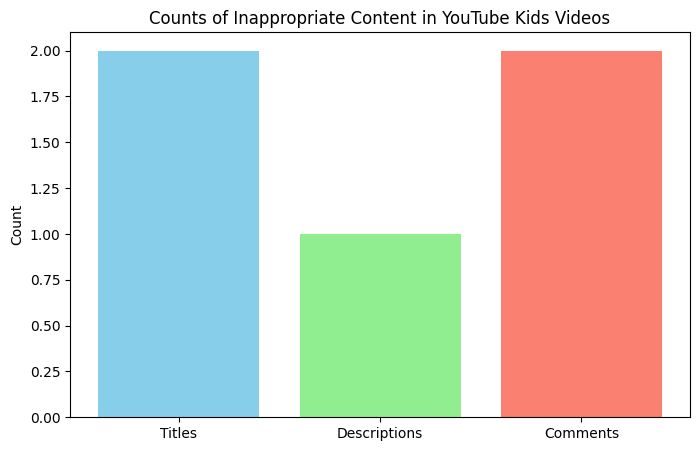

In [44]:
# Visualize inappropriate content counts
counts = [df['inappropriate_title'].sum(), df['inappropriate_description'].sum(), df['inappropriate_comment'].sum()]
labels = ['Titles', 'Descriptions', 'Comments']
plt.figure(figsize=(8,5))
plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Counts of Inappropriate Content in YouTube Kids Videos')
plt.ylabel('Count')
plt.show()

## Summary of Analysis

In [45]:
# Generate and display summary
total_videos = len(df)
inappropriate_titles = df['inappropriate_title'].sum()
inappropriate_descriptions = df['inappropriate_description'].sum()
inappropriate_comments = df['inappropriate_comment'].sum()

summary = f'''
Total videos analyzed: {total_videos}
Videos with inappropriate titles: {inappropriate_titles}
Videos with inappropriate descriptions: {inappropriate_descriptions}
Videos with inappropriate comments: {inappropriate_comments}

Key Insights:
- Most videos do not contain inappropriate content in titles, descriptions, or comments.
- If you want to improve detection, consider expanding the keyword list, changing the search query, or analyzing more videos.
'''
print(summary)



Total videos analyzed: 50
Videos with inappropriate titles: 2
Videos with inappropriate descriptions: 1
Videos with inappropriate comments: 2

Key Insights:
- Most videos do not contain inappropriate content in titles, descriptions, or comments.
- If you want to improve detection, consider expanding the keyword list, changing the search query, or analyzing more videos.

